In [1]:
# import pyodbc
# import pandas as pd
# connect = pyodbc.connect("DRIVER={MySQL ODBC 8.0 Unicode Driver}; SERVER="+'smart-service-analytics.avl.com'+"; DATABASE="+'AVL'+"; PORT="+str(3306)+"; UID="+'deviceanomaly'+"; PASSWORD="+'Ohngoh4saeWohmae')
# query2 = 'select * from '+'AVLListHQGraz_AVLParticleCounter'
# df = pd.read_sql(query2, connect)

In [2]:
# df.to_csv('APC.csv')

In [3]:
#+' limit 1000' 

In [25]:
import pandas as pd
import numpy as np
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import datetime as dt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(r'D:\Device_Anomaly\data\APC.csv')
data.rename(columns={'measuredAt':'time'},inplace=True)
data.head()

,Unnamed: 0,lastCalibrationDate,materialNumberDescription,salesforceAccount,equipmentNumber,materialNumber,masterAccount,time,serialNumber,siteAccount,softwareVersion,systemCode,systemTypeName,serialNr,equipmentNr,P_x_-Hou_OperatingTotal,P_x_-Hou_OperatingCPCPump,P_x_-Hou_OperatingRDPump,P_x_-Hou_OperatingRD,P_x_-Hou_OperatingLastService,Y_y_-Hou_NextService,Y_y_FlowPND1,Y_y_CPCPressureFlowOrifice,DailyRunTime,id
0,0,1900-01-01T00:00:00Z,AVL 489 PARTICLE COUNTER ADV.,ACC0001194,490278,GH0672,AVL,2020-03-06 19:05:13.113,192,AVL List HQ (Graz),2.30.8,489,AVL Particle Counter,192,490278,58059.0,27483.0,4079.0,5923.0,1480.0,13018.0,0.04,599.0,NaN,1
1,1,1900-01-01T00:00:00Z,AVL 489 PARTICLE COUNTER ADV.,ACC0001194,490278,GH0672,AVL,2020-03-06 19:20:37.633,192,AVL List HQ (Graz),2.30.8,489,AVL Particle Counter,192,490278,58059.0,27483.0,4079.0,5923.0,1480.0,13018.0,0.00,601.0,NaN,2
2,2,1900-01-01T00:00:00Z,AVL 489 PARTICLE COUNTER ADV.,ACC0001194,490278,GH0672,AVL,2020-03-06 19:36:00.201,192,AVL List HQ (Graz),2.30.8,489,AVL Particle Counter,192,490278,58059.0,27483.0,4079.0,5923.0,1480.0,13018.0,0.00,597.0,NaN,3
3,3,1900-01-01T00:00:00Z,AVL 489 PARTICLE COUNTER ADV.,ACC0001194,490278,GH0672,AVL,2020-03-06 19:51:22.789,192,AVL List HQ (Graz),2.30.8,489,AVL Particle Counter,192,490278,58060.0,27484.0,4079.0,5923.0,1480.0,13018.0,0.01,596.0,NaN,4
4,4,1900-01-01T00:00:00Z,AVL 489 PARTICLE COUNTER ADV.,ACC0001194,490278,GH0672,AVL,2020-03-06 20:06:43.646,192,AVL List HQ (Graz),2.30.8,489,AVL Particle Counter,192,490278,58060.0,27484.0,4080.0,5923.0,1480.0,13018.0,4.89,600.0,NaN,5


In [130]:
data.materialNumberDescription.unique()

array(['AVL 489 PARTICLE COUNTER ADV.',
       'AVL PARTICLE COUNTER ADV SUB 23NM 489'], dtype=object)

In [131]:
pd.DataFrame(data.columns)

,0
0,Unnamed: 0
1,lastCalibrationDate
2,materialNumberDescription
3,salesforceAccount
4,equipmentNumber
5,materialNumber
6,masterAccount
7,time
8,serialNumber
9,siteAccount


In [27]:

data['time'] = data['time'].astype('datetime64[ns]')
data['date'] = data['time'].dt.date
data = data.sort_values('date',ascending=False).reset_index() 
#data.to_csv('ABCD2.csv')
# data['month'] = data['date'].dt.month
# data['year'] = data['date'].dt.year
# data['DATE'] = pd.to_datetime(data[['year', 'month']].assign(DAY=1)).astype('datetime64[D]')
# data[['time', 'date', 'month','year', 'DATE']].head()


In [28]:
dff = data[['time','date','equipmentNumber','P_x_-Hou_OperatingLastService','Y_y_FlowPND1','Y_y_CPCPressureFlowOrifice']]

In [29]:
df = dff.groupby(['date','equipmentNumber']).mean().reset_index()
df = df.sort_values('date',ascending=False).reset_index() 
df.head()
#df.to_csv('ABCD.csv')

,index,date,equipmentNumber,P_x_-Hou_OperatingLastService,Y_y_FlowPND1,Y_y_CPCPressureFlowOrifice
0,2562,2020-10-07,1792283,1190.0,0.000000,-1.285714
1,2561,2020-10-07,1708209,938.0,-0.020000,-1.071429
2,2560,2020-10-07,1484462,57.0,0.000000,534.285714
3,2559,2020-10-07,1205837,1547.0,0.000000,591.000000
4,2558,2020-10-07,936305,424.0,0.357143,123.285714


In [30]:
data = data[28938:120591]
df = df[376:1496]

## Boxplot of channel - Y_y_FlowPND1


### Individual equipment no.

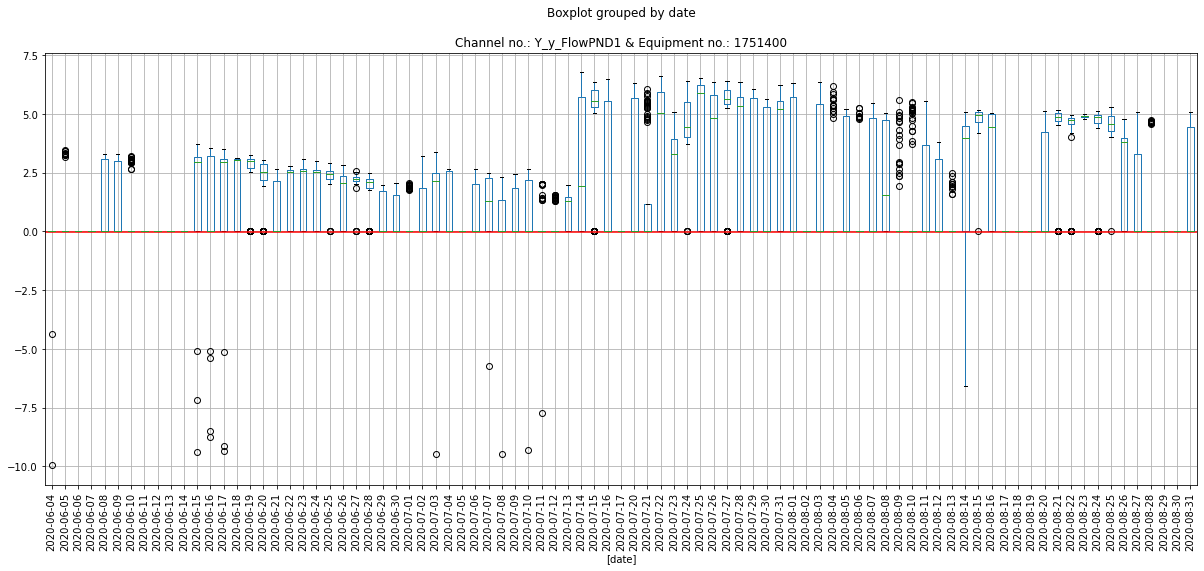

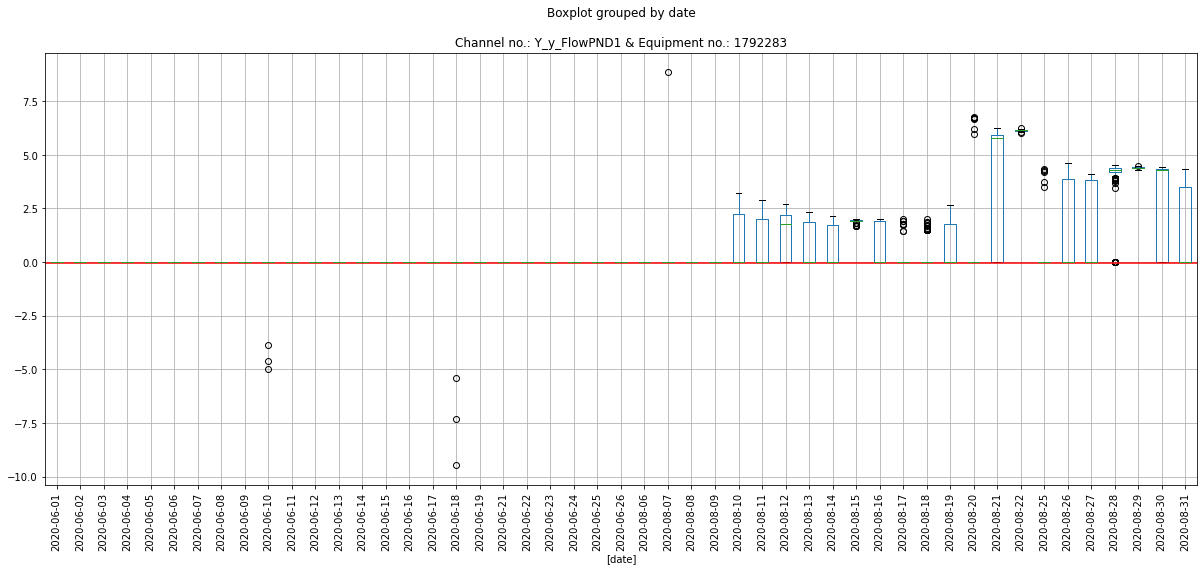

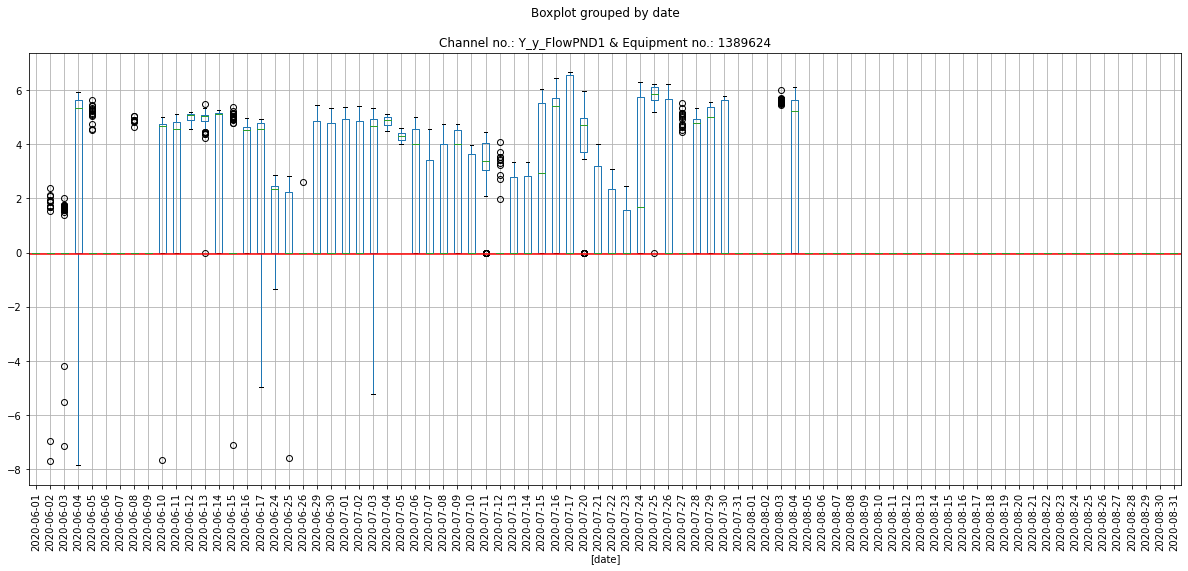

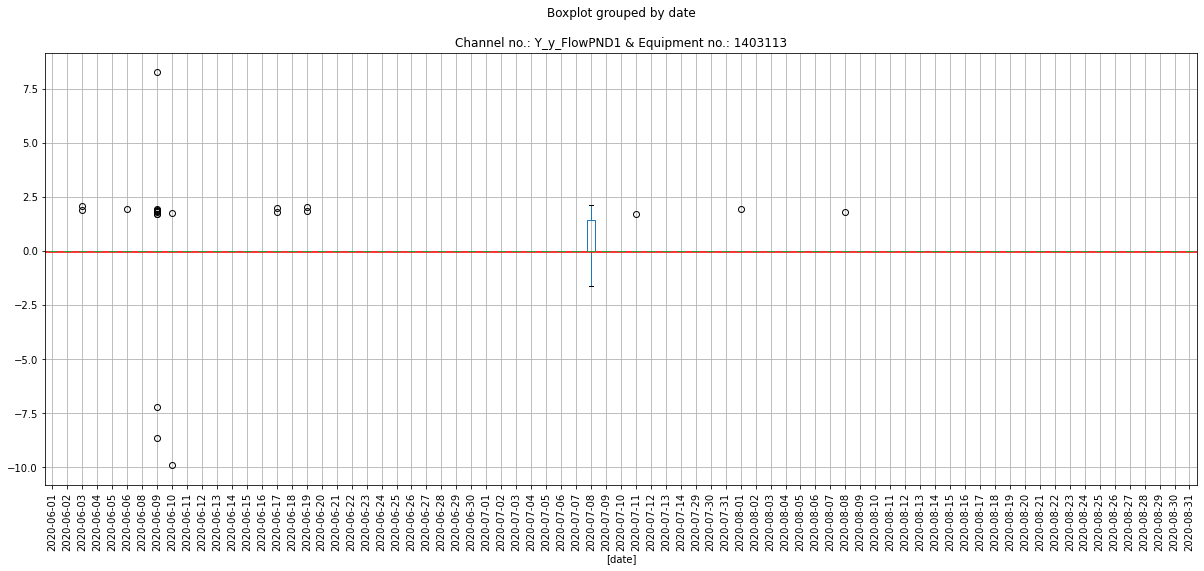

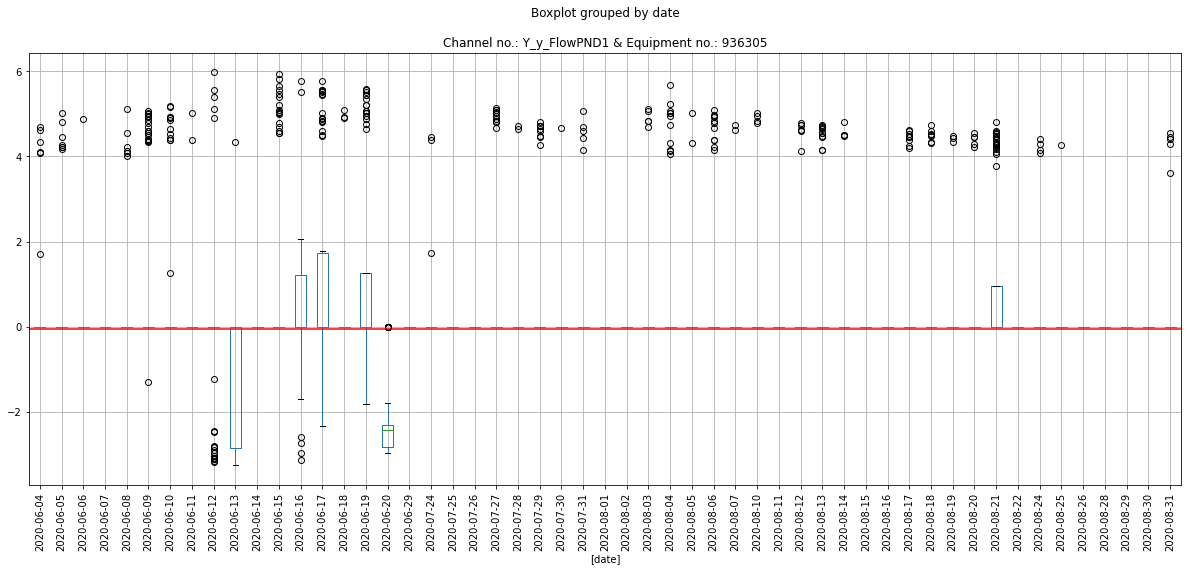

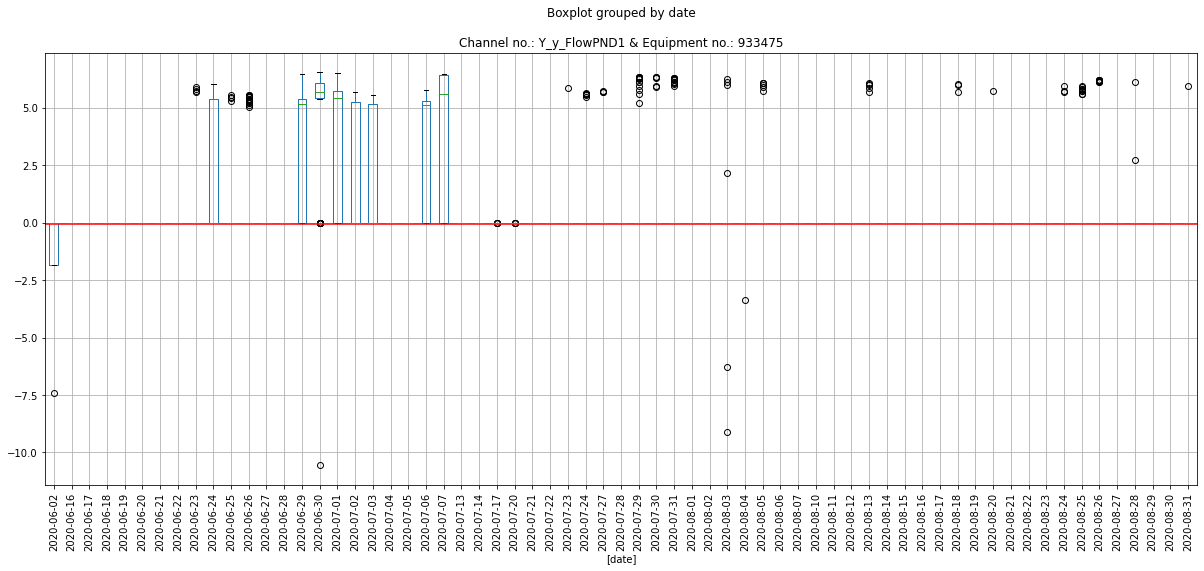

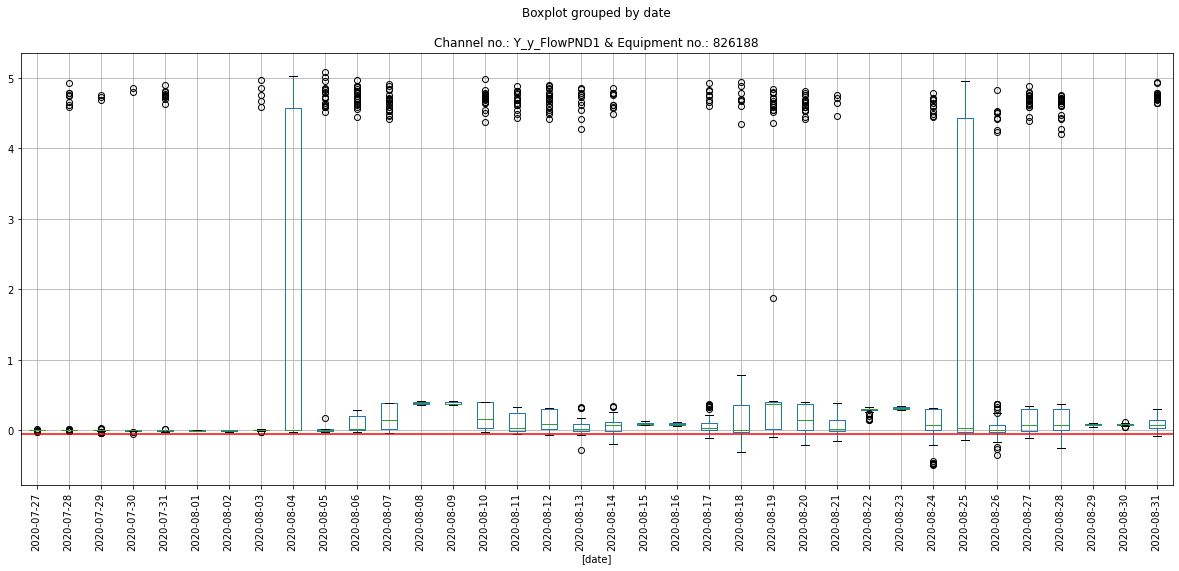

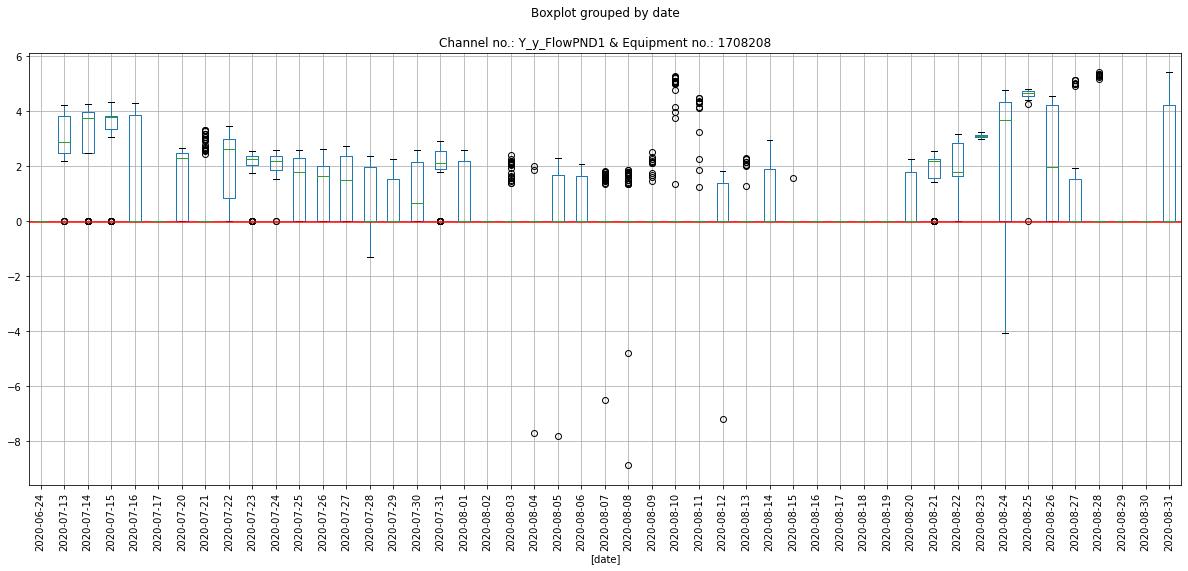

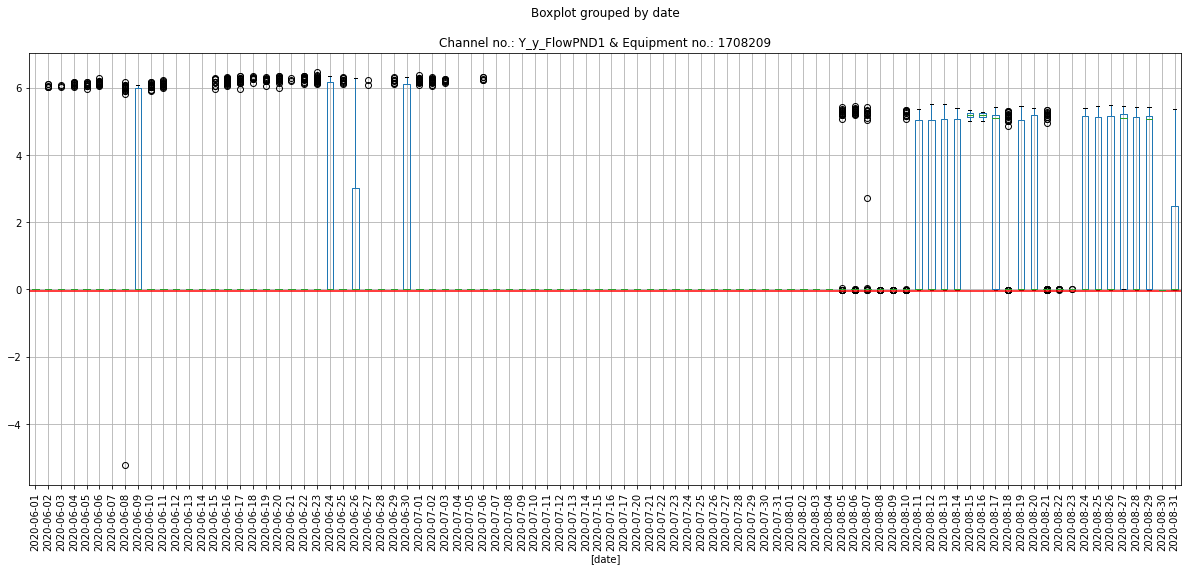

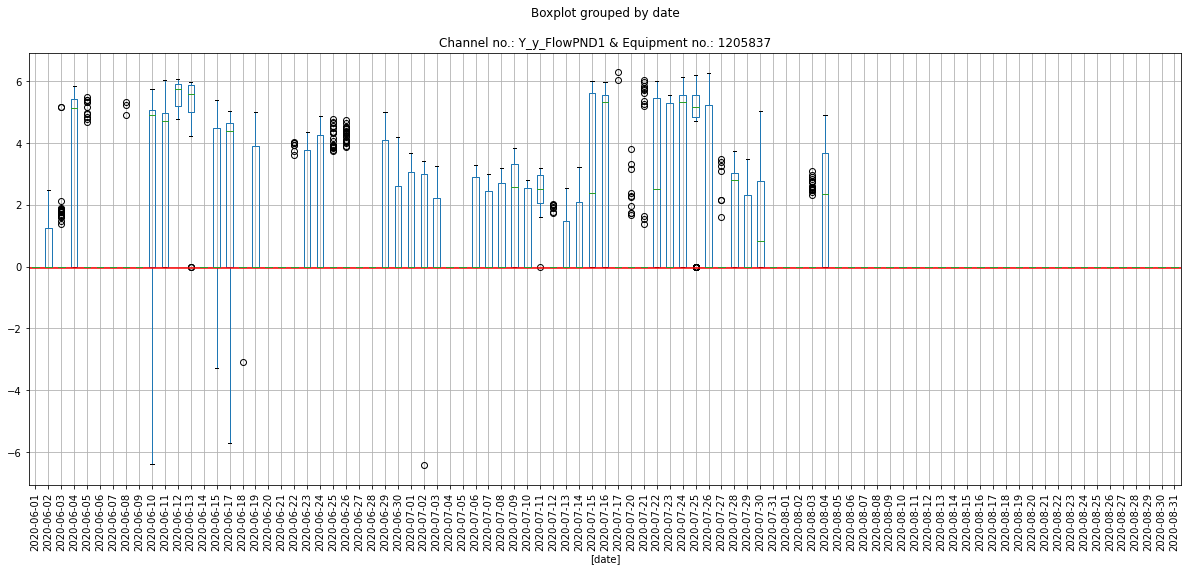

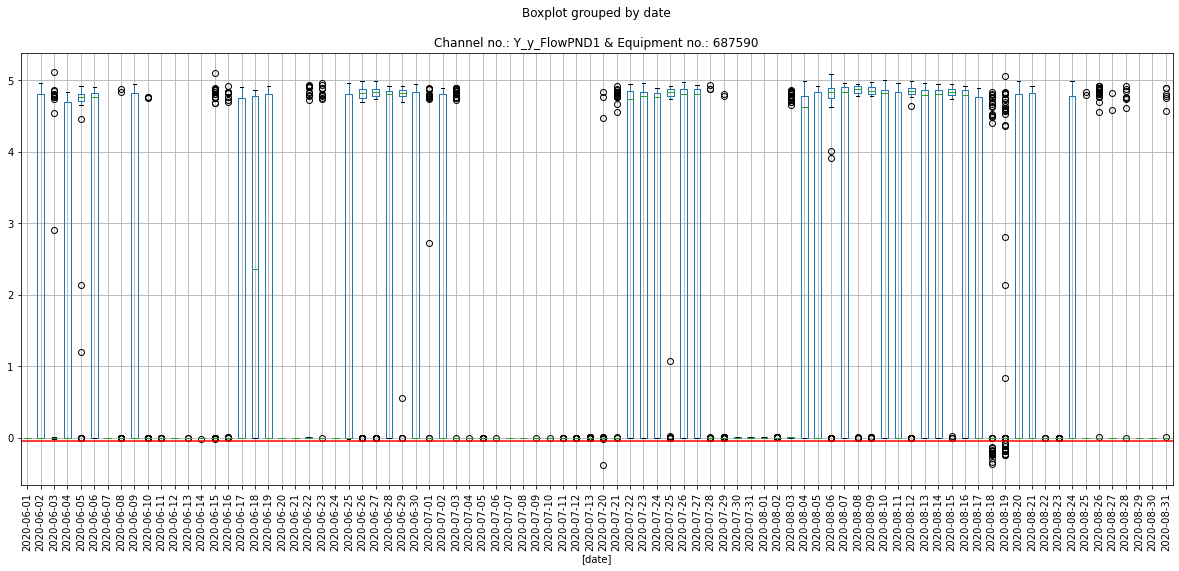

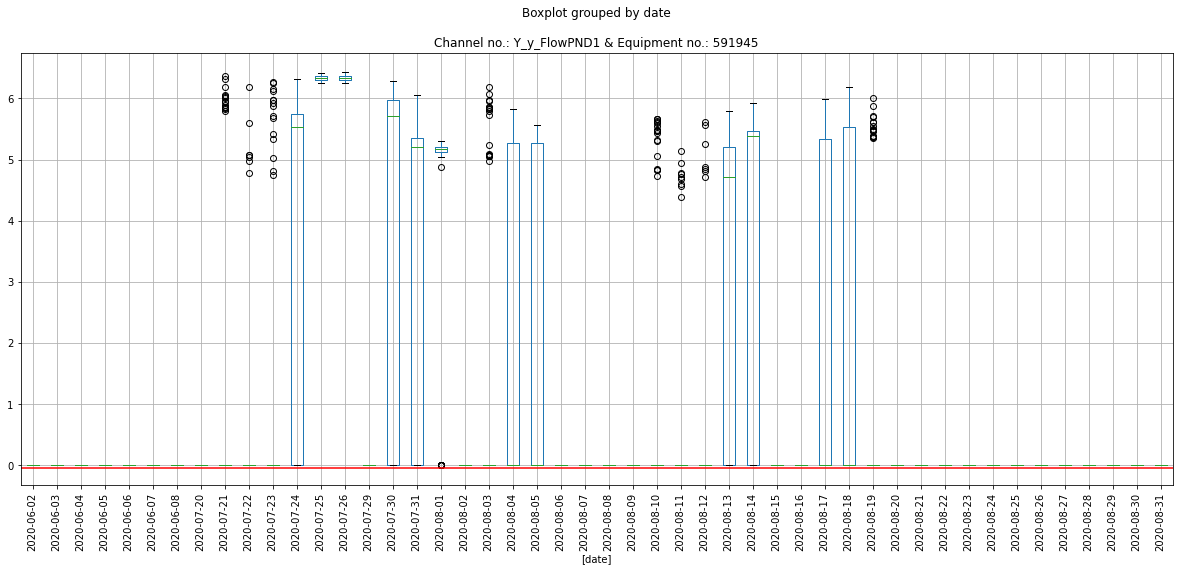

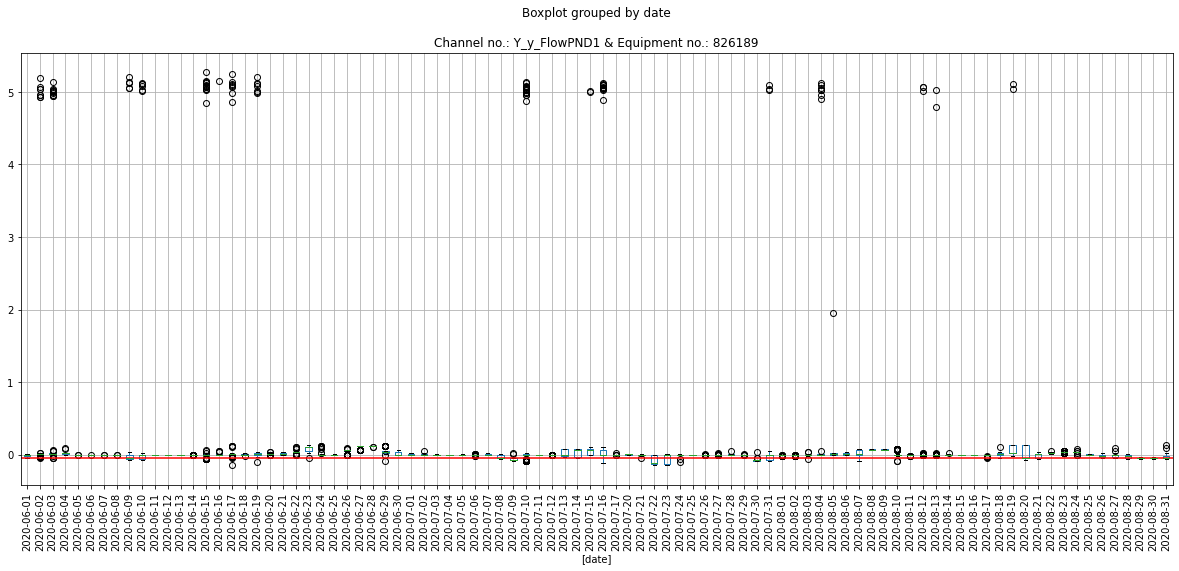

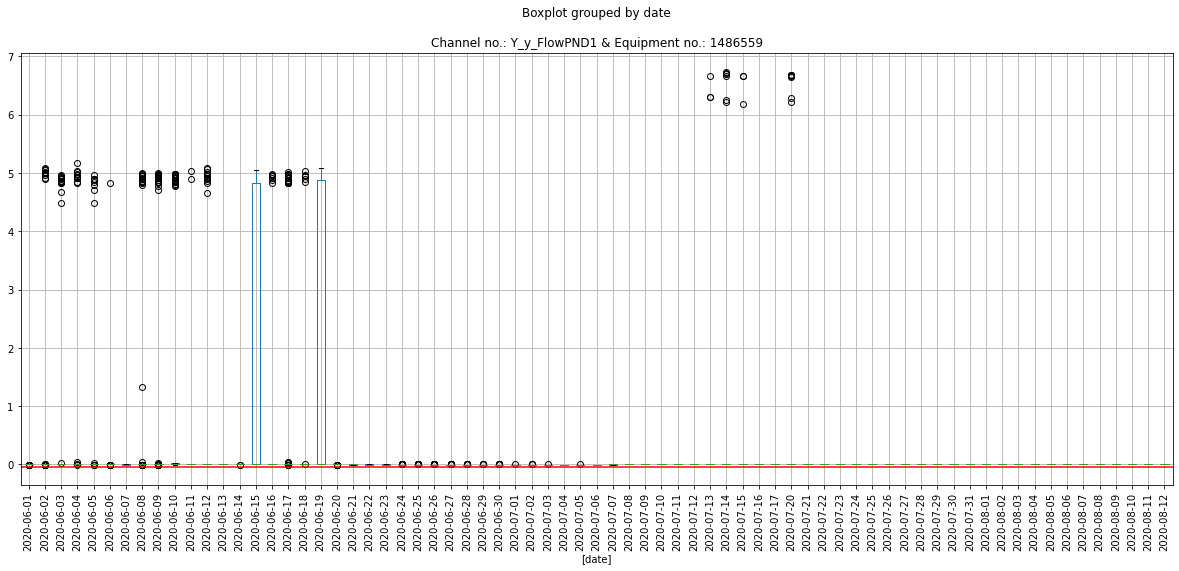

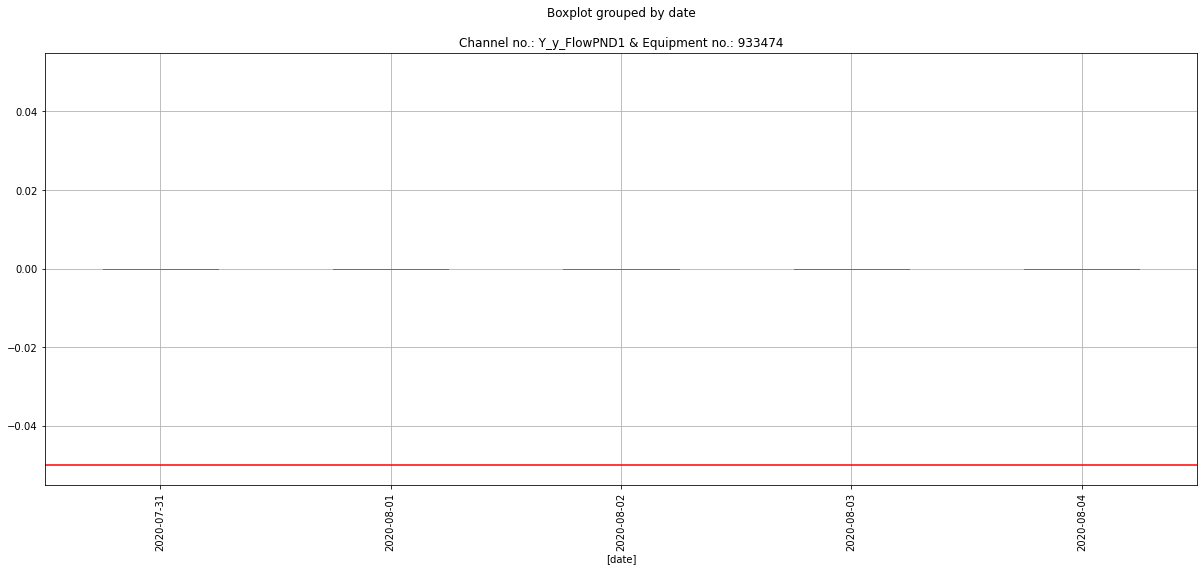

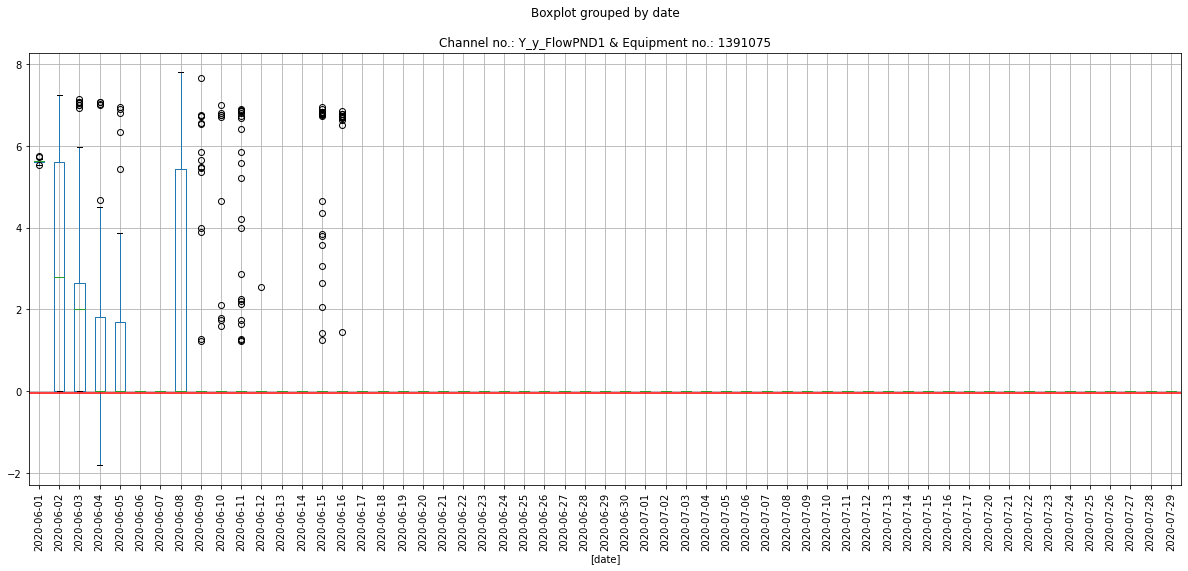

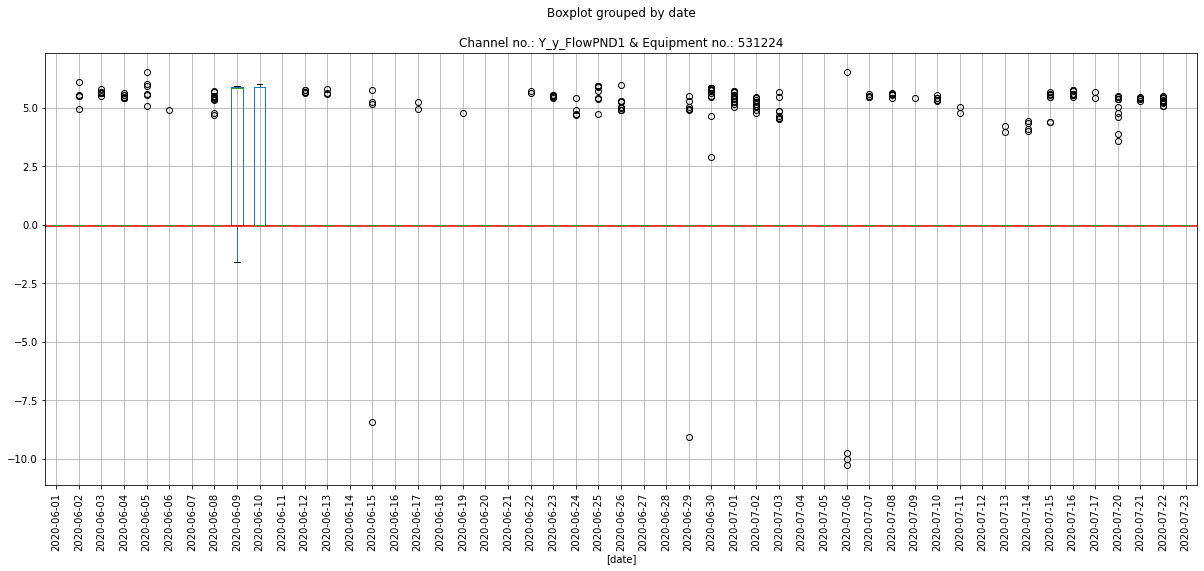

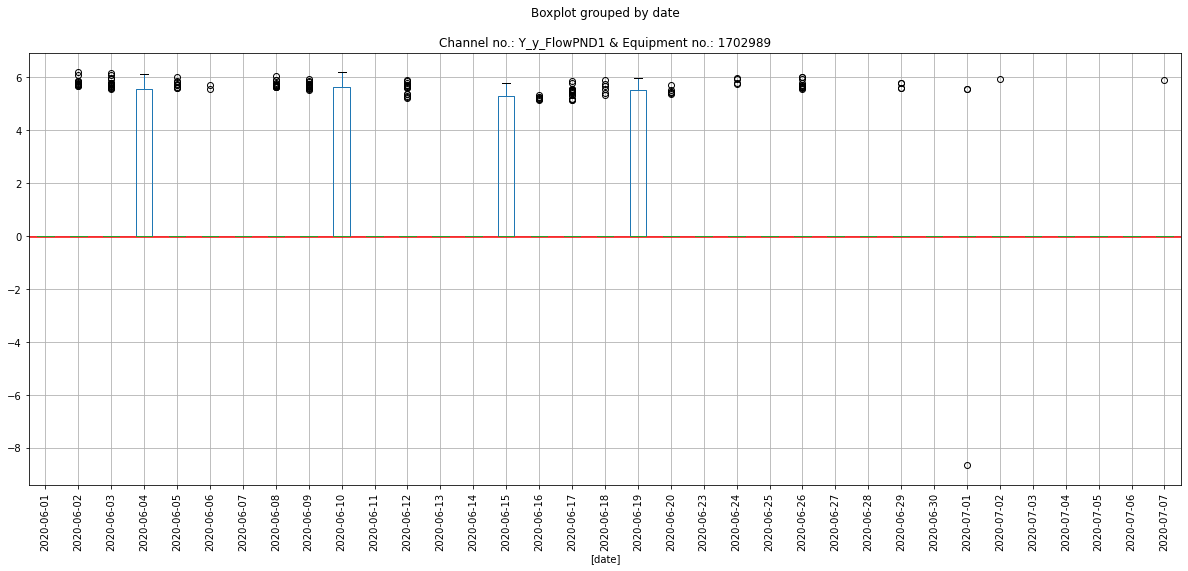

In [31]:
for i in list(data['equipmentNumber'].unique()):
    data[data['equipmentNumber']==i].boxplot(column=['Y_y_FlowPND1'], by=['date'], figsize = (20,8),rot=90)
    plt.title('Channel no.: Y_y_FlowPND1 & Equipment no.: '+ str(i))
    plt.axhline(-0.05, c='r') 
    plt.show()

### Overall equipment no.

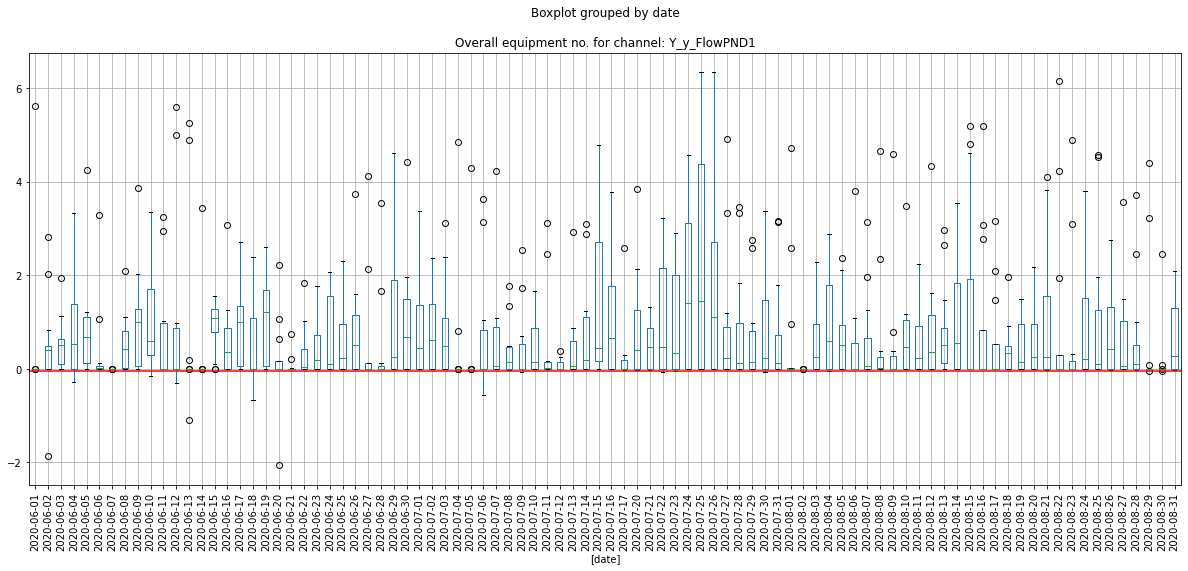

In [32]:
df.boxplot(column=['Y_y_FlowPND1'], by=['date'], figsize = (20,8),rot=90)
plt.title('Overall equipment no. for channel: Y_y_FlowPND1')
plt.axhline(-0.05, c='r') 
plt.show()

## Boxplot of channel - Y_y_CPCPressureFlowOrifice

### Individual equipment no.

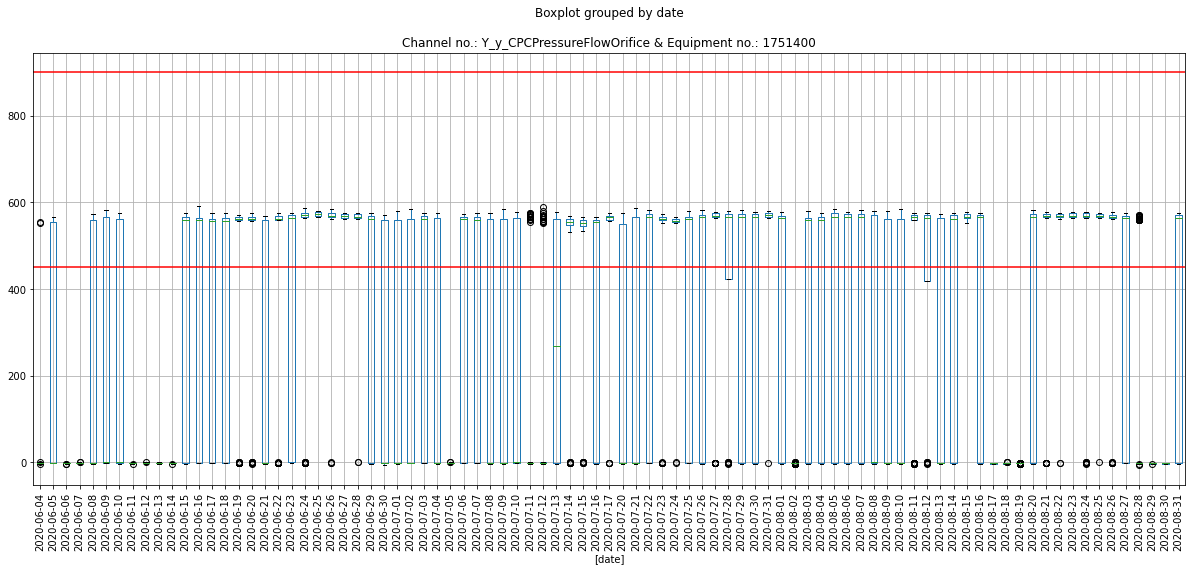

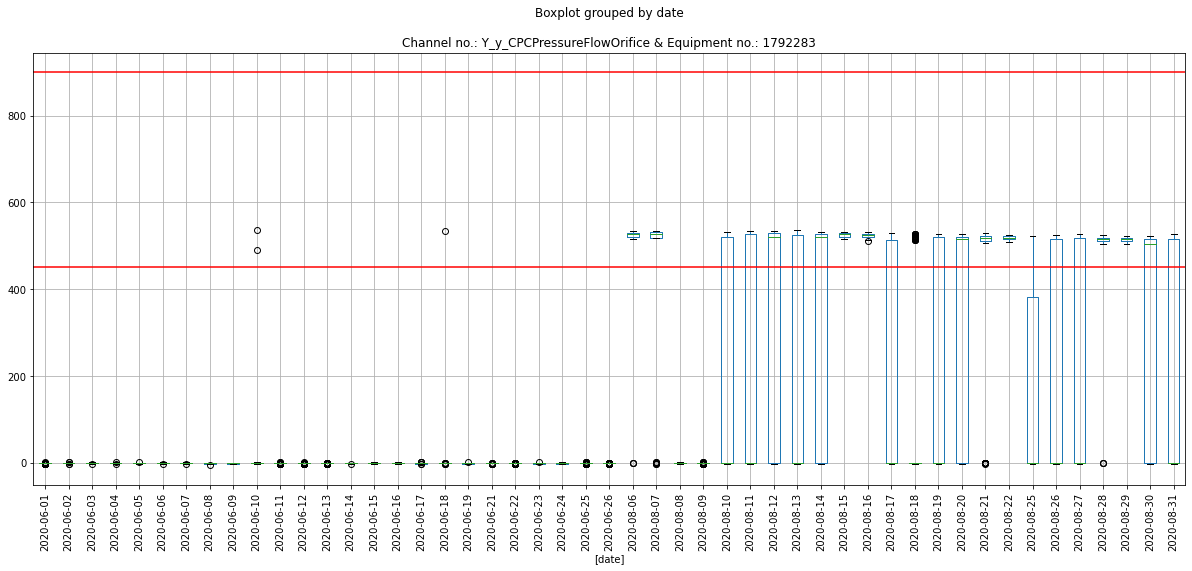

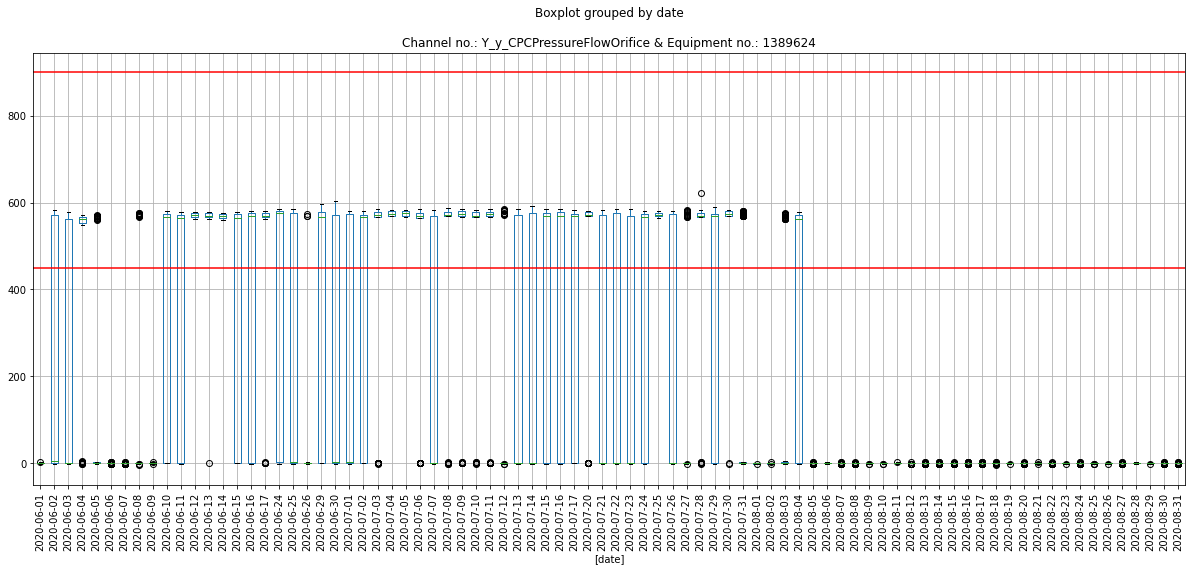

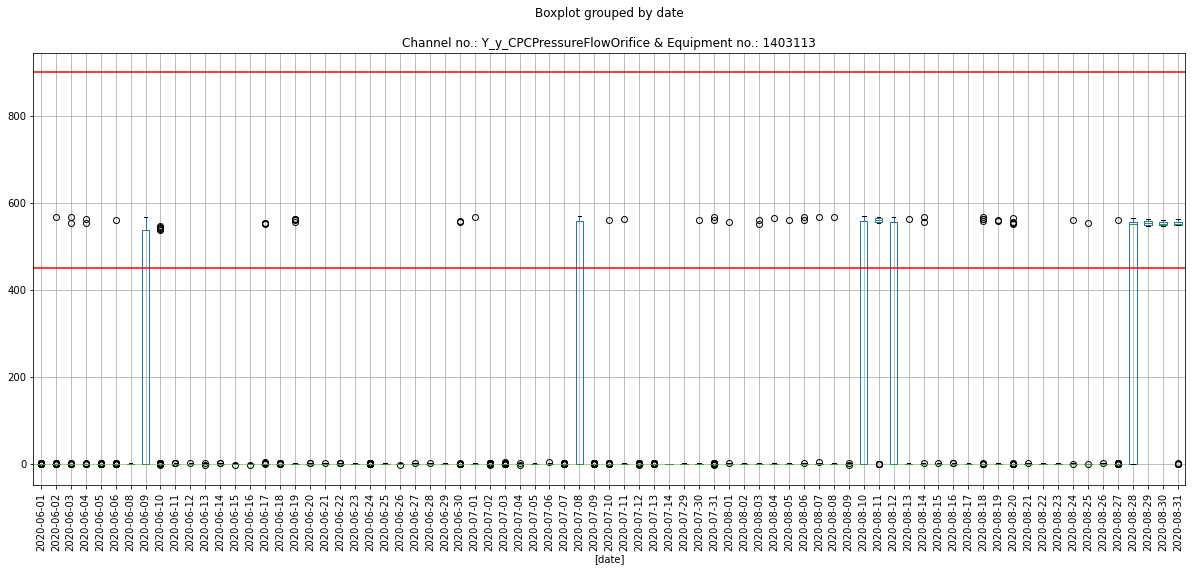

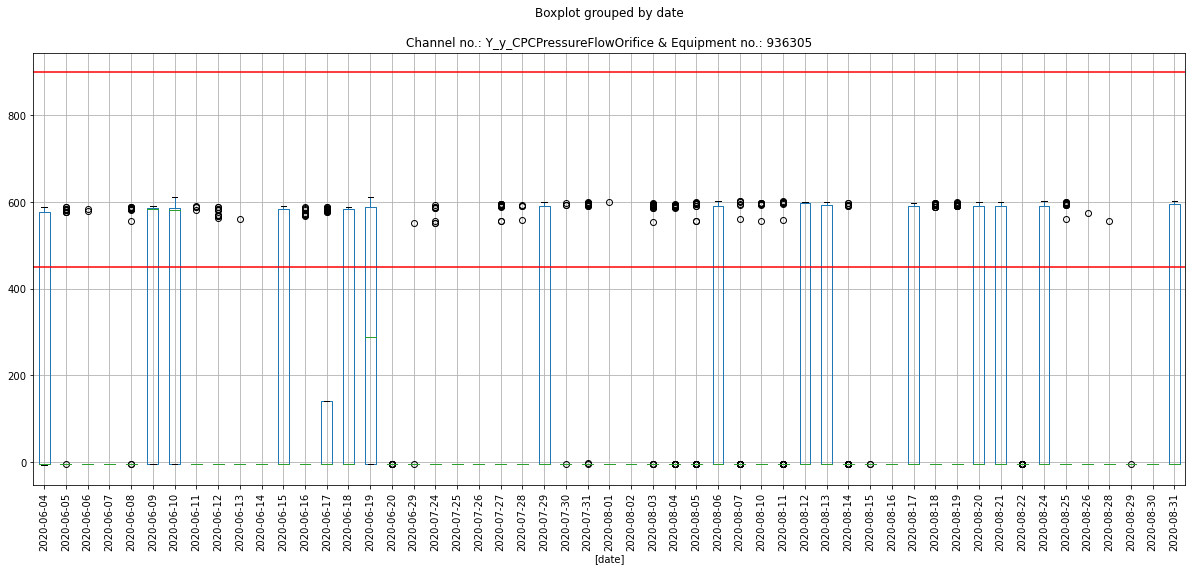

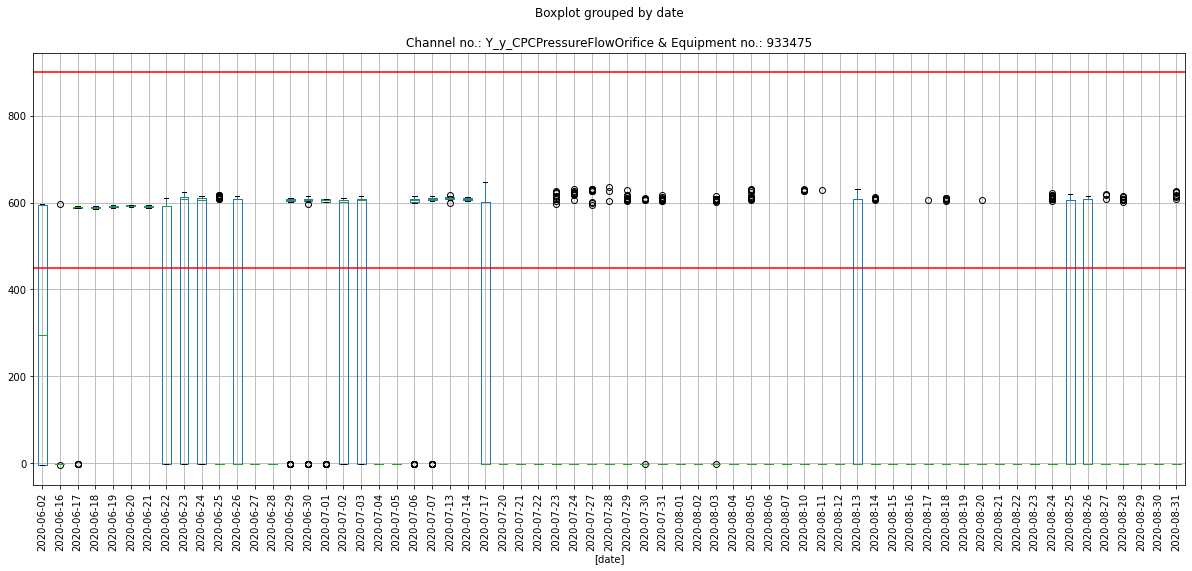

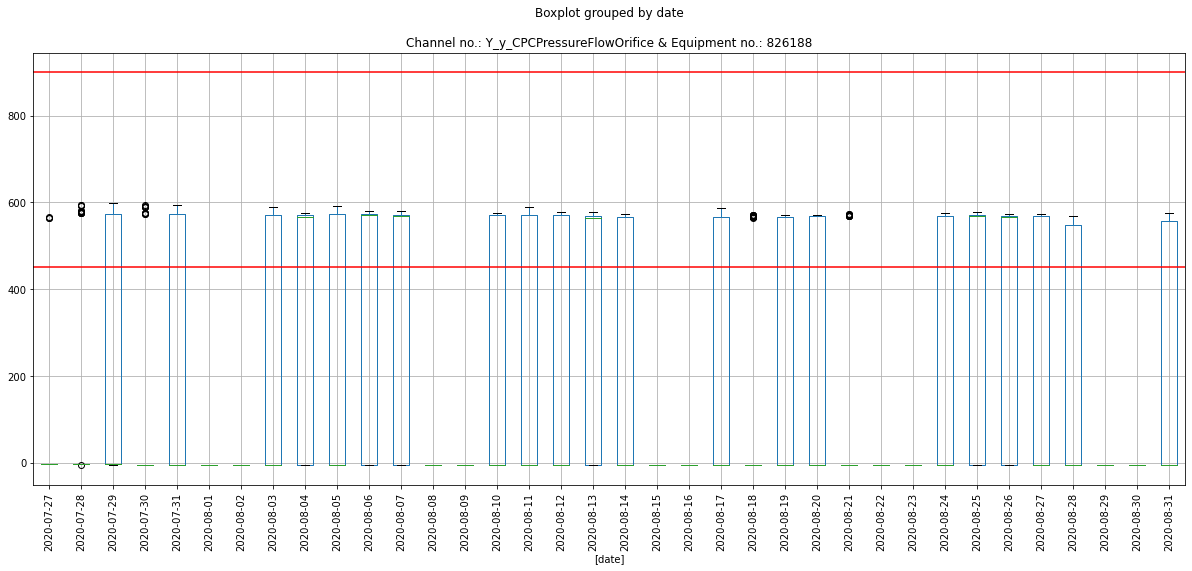

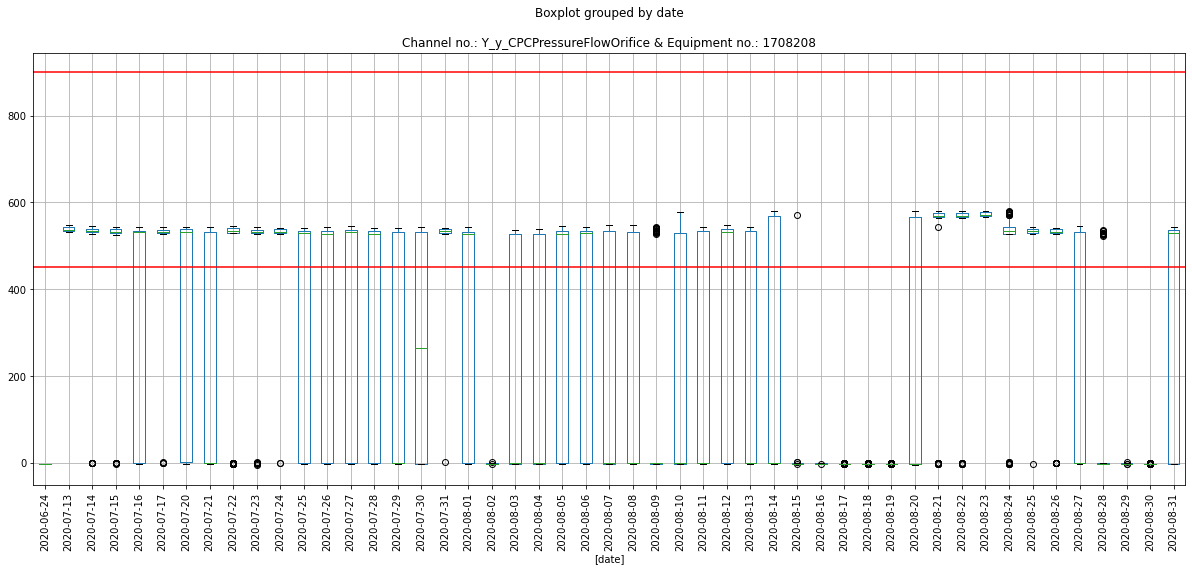

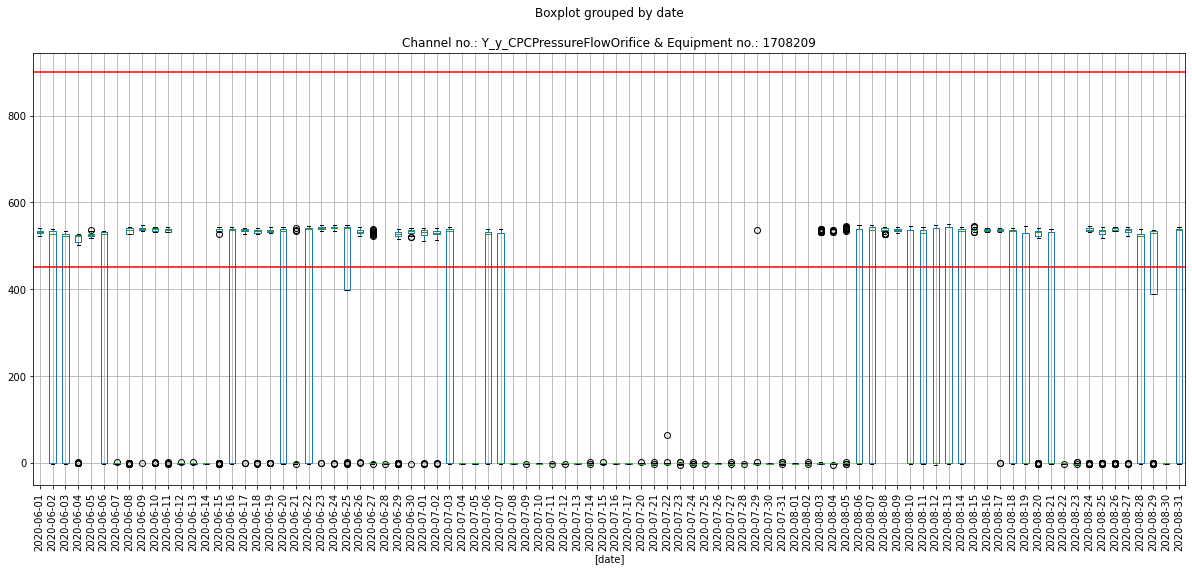

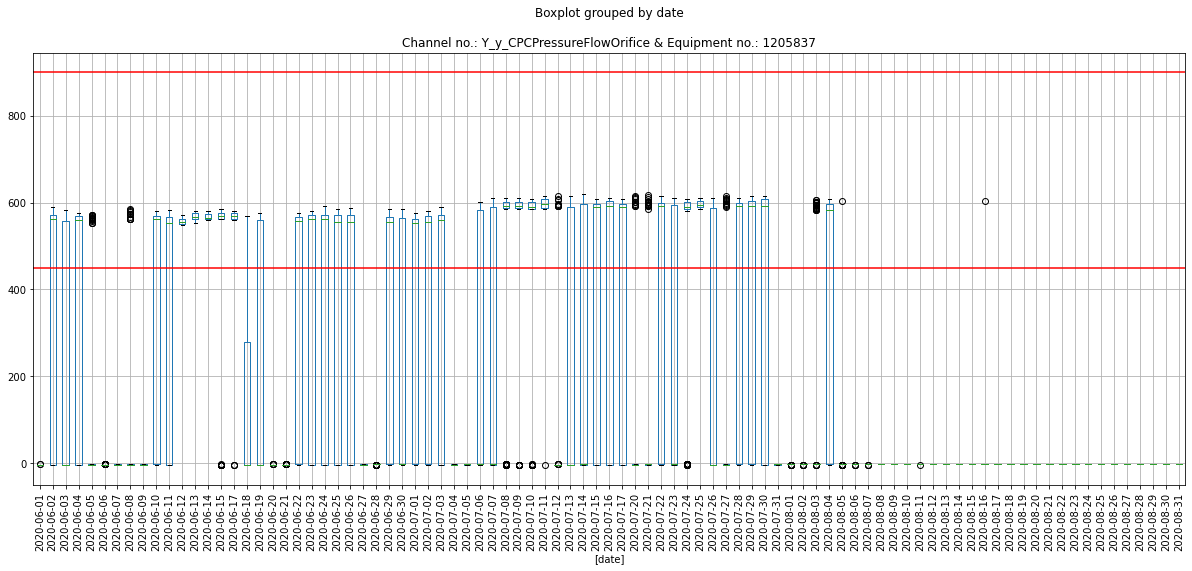

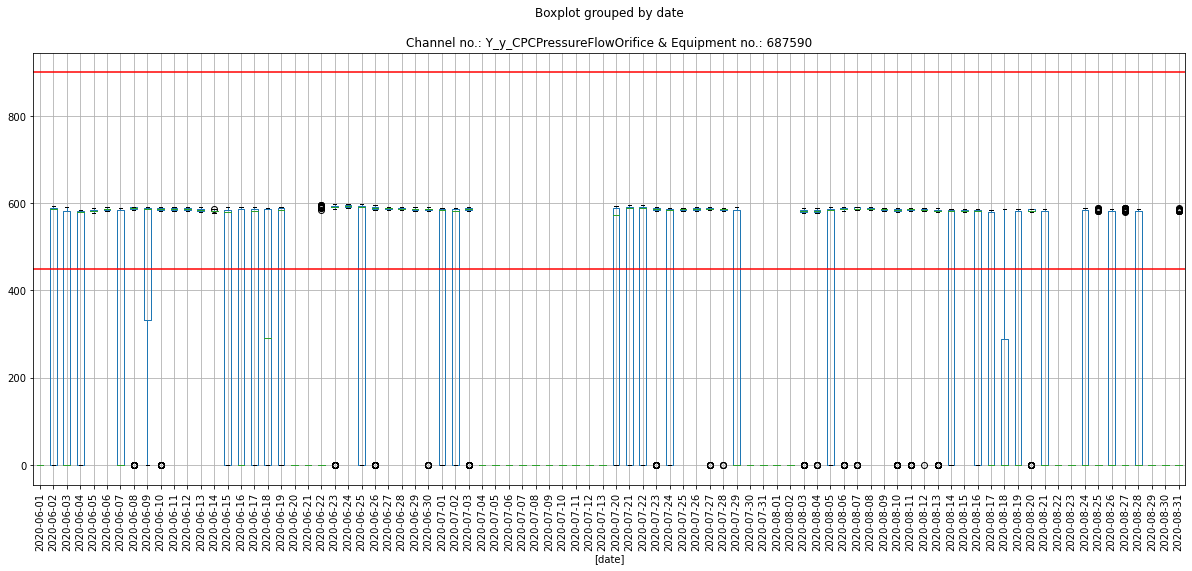

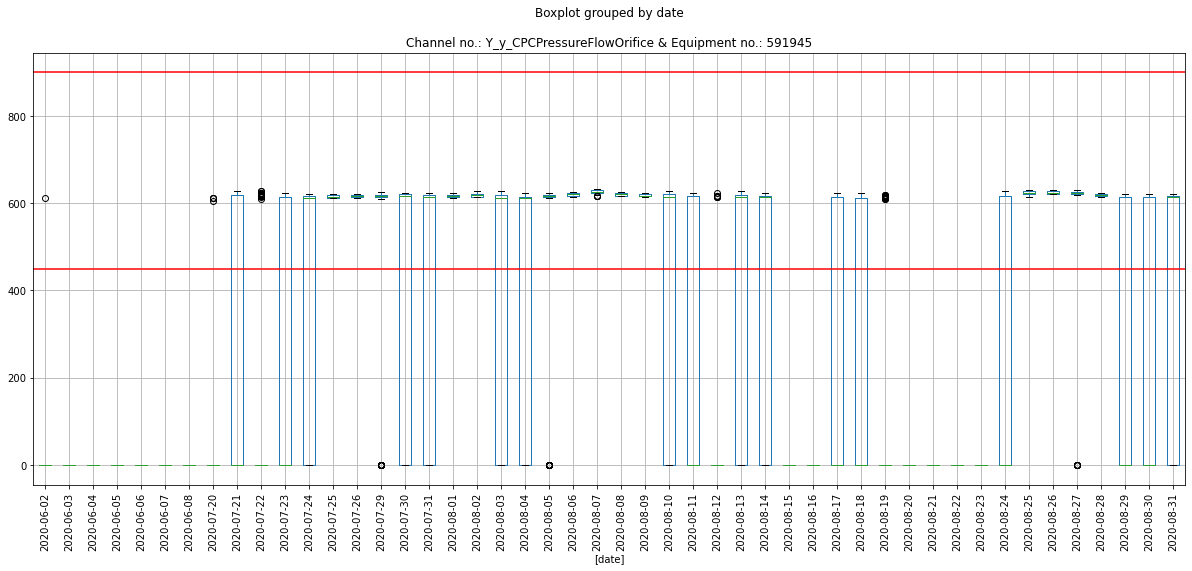

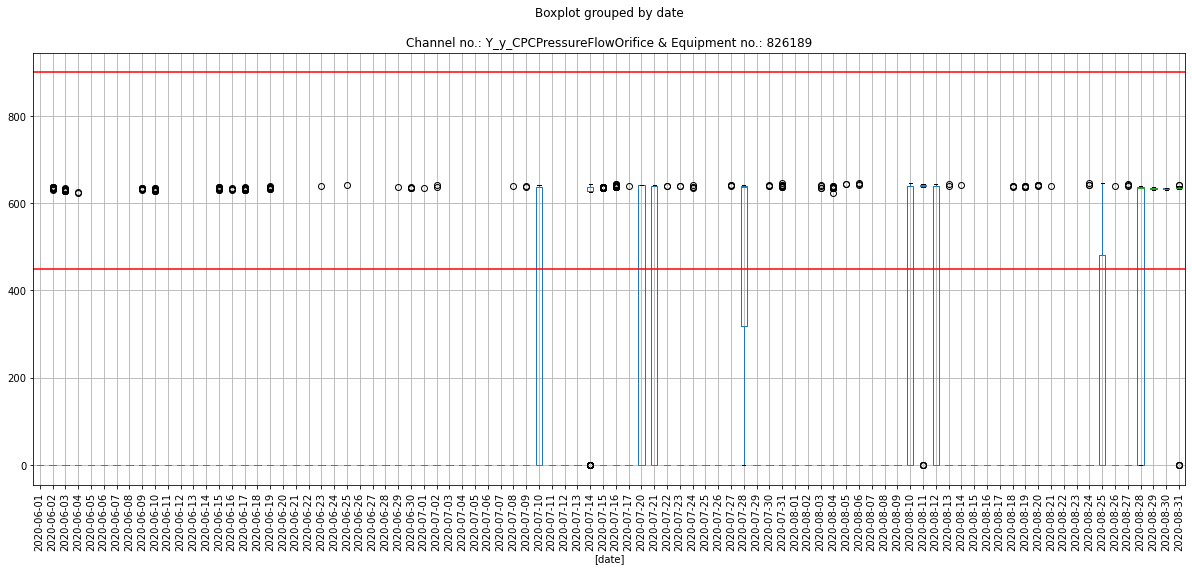

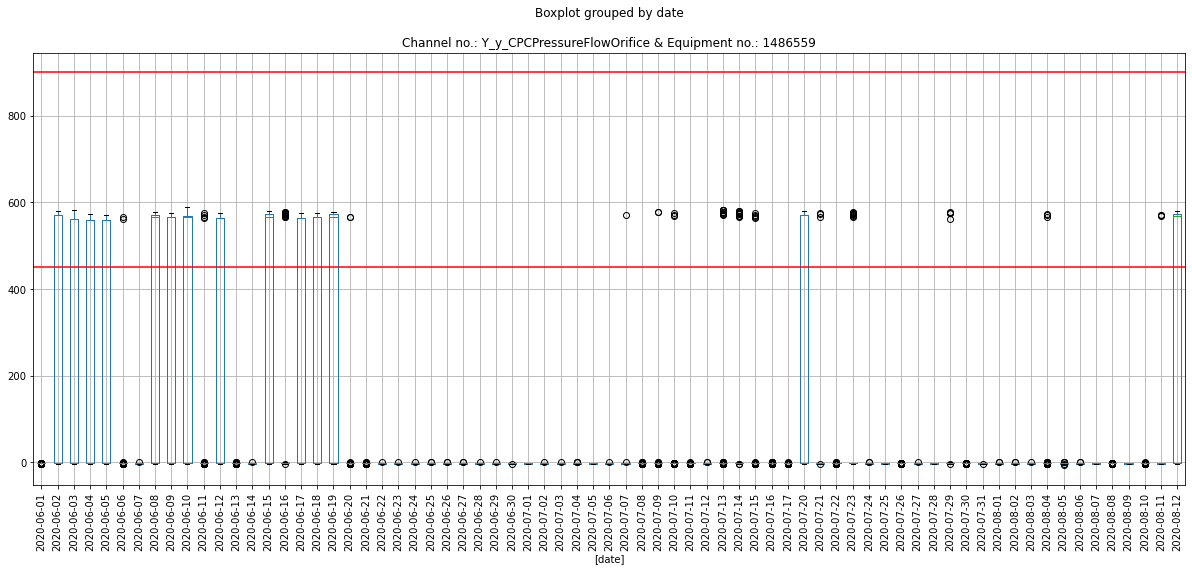

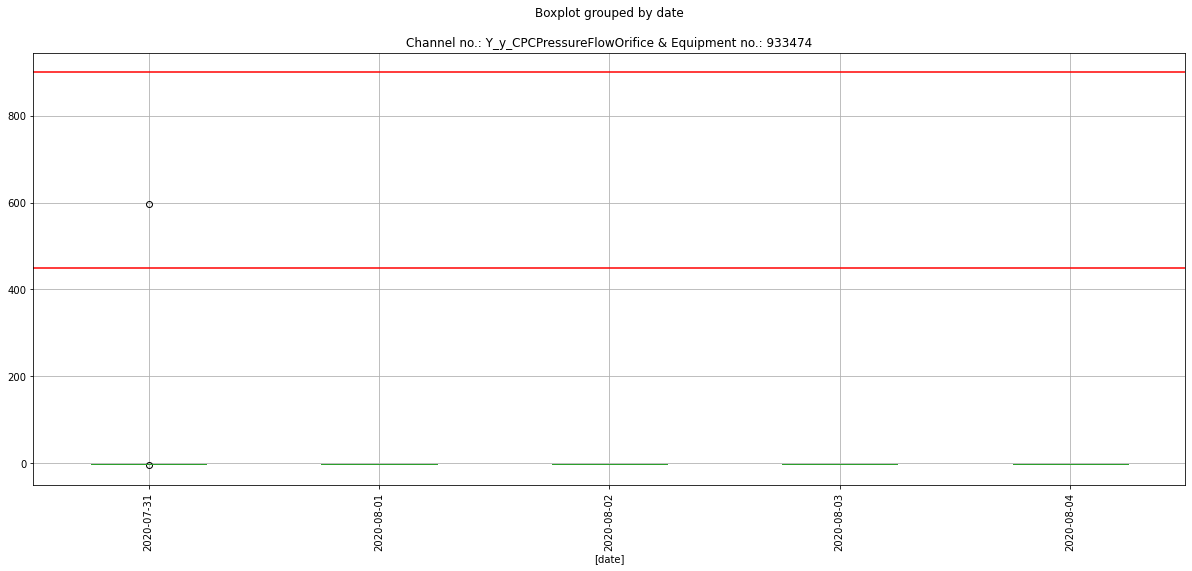

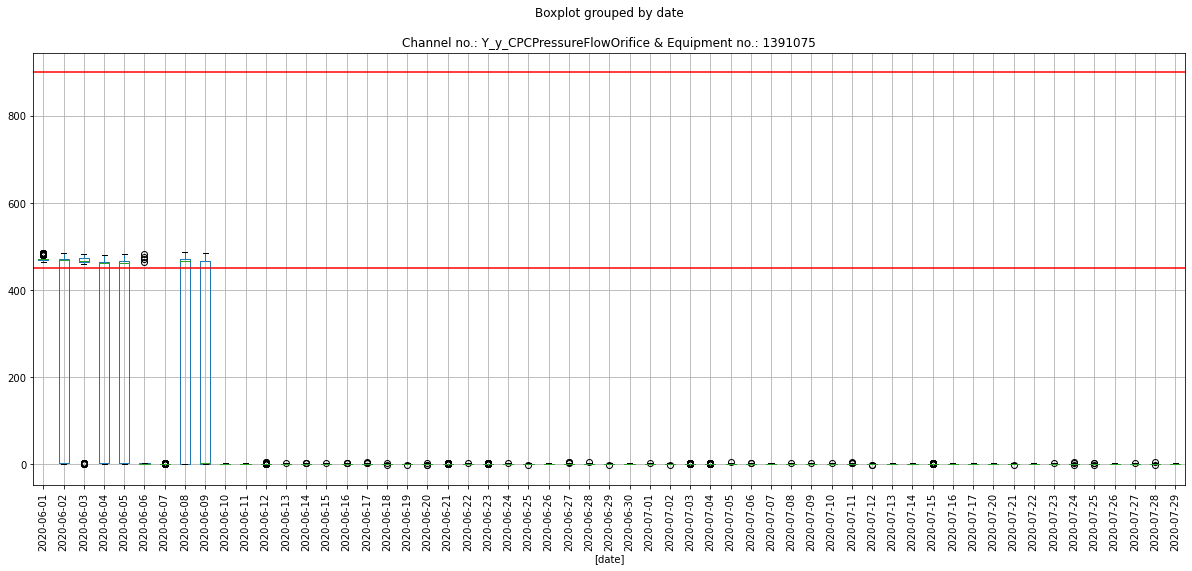

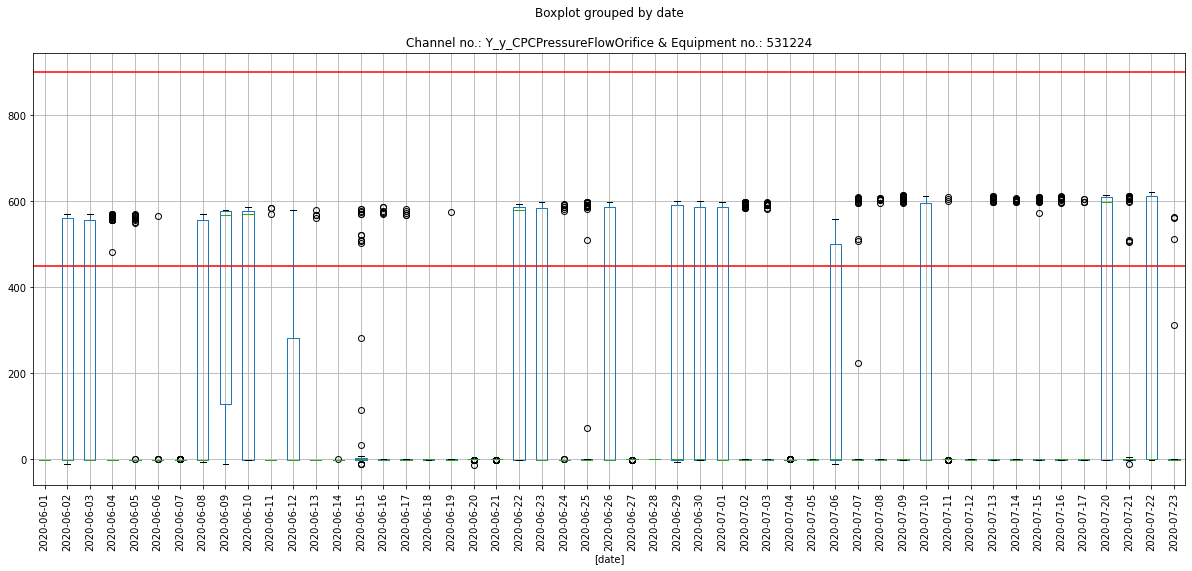

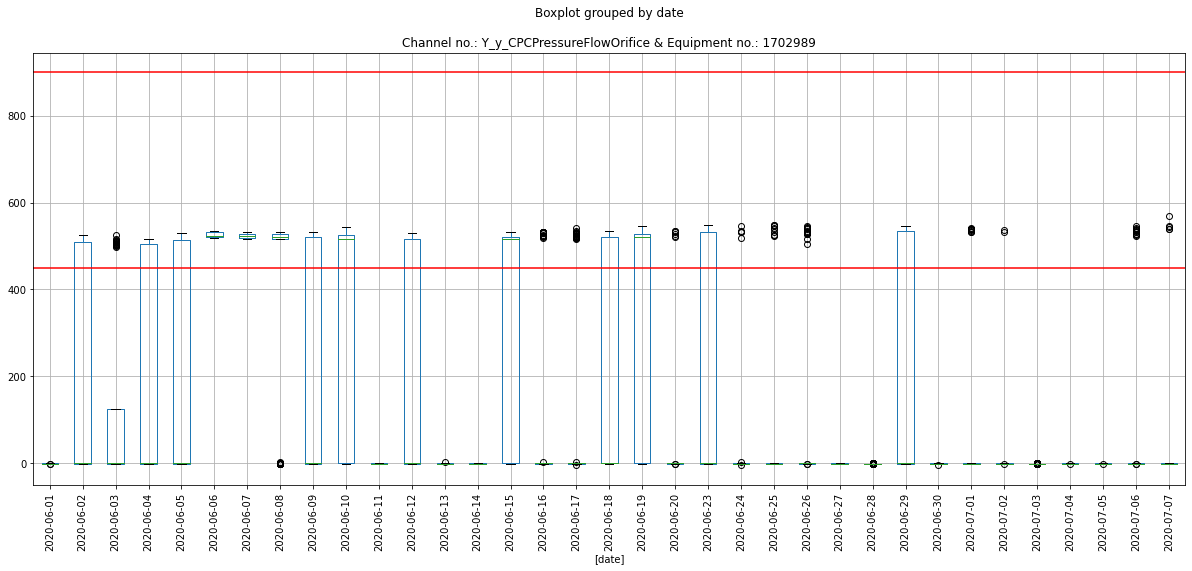

In [37]:
for i in list(data['equipmentNumber'].unique()):
    data[data['equipmentNumber']==i].boxplot(column=['Y_y_CPCPressureFlowOrifice'], by=['date'], figsize = (20,8),rot=90)
    plt.title('Channel no.: Y_y_CPCPressureFlowOrifice & Equipment no.: '+ str(i))
    plt.axhline(450, c='r') 
    plt.axhline(900, c='r') 
    plt.show()

### Overall equipment no.

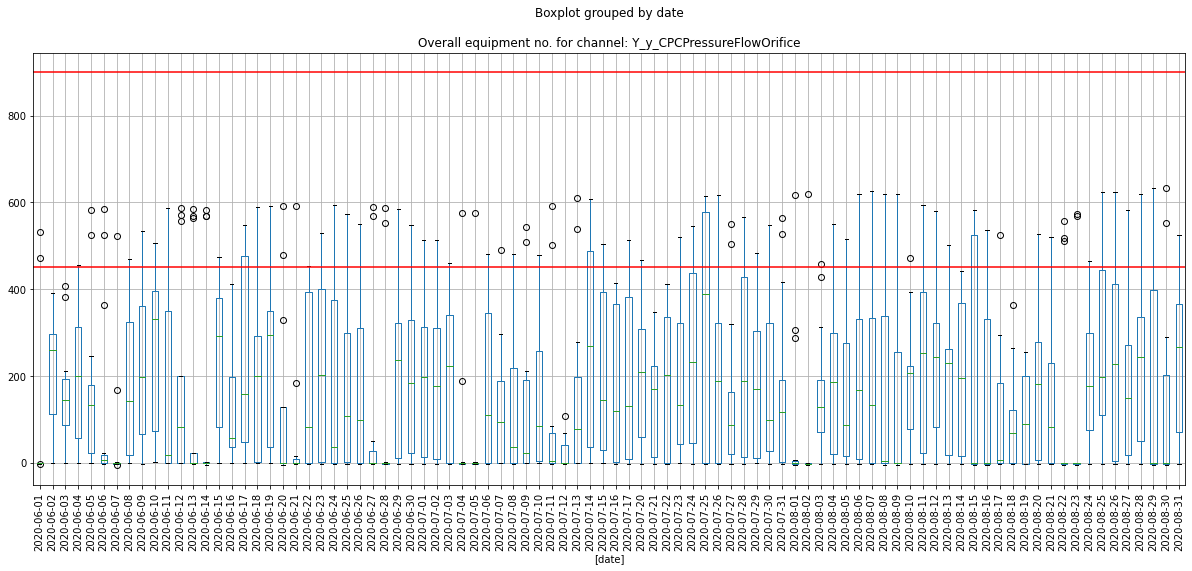

In [59]:
df.boxplot(column=['Y_y_CPCPressureFlowOrifice'], by=['date'], figsize = (20,8),rot=90)
plt.title('Overall equipment no. for channel: Y_y_CPCPressureFlowOrifice')
plt.axhline(450, c='r') 
plt.axhline(900, c='r')  
plt.show()

In [60]:
dff.shape

(363545, 6)

In [61]:
dff.head()

,time,date,equipmentNumber,P_x_-Hou_OperatingLastService,Y_y_FlowPND1,Y_y_CPCPressureFlowOrifice
0,2020-10-07 03:12:23.110,2020-10-07,936305,424.0,0.00,592.0
1,2020-10-07 02:37:01.096,2020-10-07,1708209,938.0,-0.02,-2.0
2,2020-10-07 02:28:11.397,2020-10-07,1484462,57.0,0.00,542.0
3,2020-10-07 02:43:43.954,2020-10-07,1484462,57.0,0.00,529.0
4,2020-10-07 02:59:17.435,2020-10-07,1484462,57.0,0.00,542.0


# Check Data going out of range

In [49]:
out_of_range = pd.melt(dff, id_vars =['equipmentNumber'], value_vars =['Y_y_FlowPND1','Y_y_CPCPressureFlowOrifice']) 
out_of_range.rename(columns={'variable':'Channel name'},inplace=True)
out_of_range

,equipmentNumber,Channel name,value
0,936305,Y_y_FlowPND1,0.00
1,1708209,Y_y_FlowPND1,-0.02
2,1484462,Y_y_FlowPND1,0.00
3,1484462,Y_y_FlowPND1,0.00
4,1484462,Y_y_FlowPND1,0.00
...,...,...,...
727085,1205837,Y_y_CPCPressureFlowOrifice,-4.00
727086,1205837,Y_y_CPCPressureFlowOrifice,-4.00
727087,1205837,Y_y_CPCPressureFlowOrifice,-4.00
727088,1486559,Y_y_CPCPressureFlowOrifice,-1.00


In [48]:
df1 = pd.read_excel(r'D:\Device_Anomaly\data\channel_limits.xlsx')
df1

,Device,Channel name,Descriptive name,Value,Min,Max,Default,Unit,State
0,APC,Y_y_CPCPressureFlowOrifice,Pressure Flow Orifice,0.0,450.00,900.0,560,mbar,5
1,APC,Y_y_FlowPND1,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5
2,MSS,P_x_SinceLastServiceHours,Hours Since Last Service,0.0,0.00,200000.0,0,h,5
3,MSS,Y_y_mf_DILMFM,MFM Mass Flow,18.0,0.00,5000.0,0,ml/min,5
4,MSS,Y_y_GasTemp,Gas Temperature,56.0,0.00,60.0,50,°C,5
5,MSS,Y_y_RelPressure,Relative Pressure,32.0,-110.00,60.0,20,mbar,5
6,MSS,Y_y_Flow,Flow,2.4,0.00,2.5,1,l/min,5
7,MSS,Y_y_TECoolerHumidity,TE Cooler Humidity,10.0,0.00,80.0,10,%rel.H.,5
8,MSS,Y_y_DilutionRatio,Dilution Ratio,1.0,1.00,100.0,1,No Unit,5
9,MSS,Y_y_MonitorDiode,Monitor Diode,300.0,0.00,2500.0,300,mV,5


In [50]:
out_of_range = out_of_range.merge(df1, on = 'Channel name')
out_of_range.rename(columns={'variable':'Channel name'},inplace=True)
out_of_range[(out_of_range['Value']>out_of_range['Min']) & (out_of_range['Value']<out_of_range['Max'])]

,equipmentNumber,Channel name,value,Device,Descriptive name,Value,Min,Max,Default,Unit,State
0,936305,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5
1,1708209,Y_y_FlowPND1,-0.02,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5
2,1484462,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5
3,1484462,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5
4,1484462,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5
...,...,...,...,...,...,...,...,...,...,...,...
363540,1205837,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5
363541,1205837,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5
363542,1205837,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5
363543,1486559,Y_y_FlowPND1,-0.01,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5


In [51]:
out_of_range['Channel name'].unique

<bound method Series.unique of 0                       Y_y_FlowPND1
1                       Y_y_FlowPND1
2                       Y_y_FlowPND1
3                       Y_y_FlowPND1
4                       Y_y_FlowPND1
                     ...            
727085    Y_y_CPCPressureFlowOrifice
727086    Y_y_CPCPressureFlowOrifice
727087    Y_y_CPCPressureFlowOrifice
727088    Y_y_CPCPressureFlowOrifice
727089    Y_y_CPCPressureFlowOrifice
Name: Channel name, Length: 727090, dtype: object>

In [90]:
out_of_range['Value'].dtype

dtype('float64')

In [116]:
out_of_range['flag'] = None
out_of_range['flag'] = np.where((out_of_range['value'] < out_of_range['Min']) | (out_of_range['value'] > out_of_range['Max']),1,0)

In [117]:
out_of_range.head(10)

,equipmentNumber,Channel name,value,Device,Descriptive name,Value,Min,Max,Default,Unit,State,flag
0,936305,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5,0
1,1708209,Y_y_FlowPND1,-0.02,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5,0
2,1484462,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5,0
3,1484462,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5,0
4,1484462,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5,0
5,1484462,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5,0
6,1484462,Y_y_FlowPND1,0.00,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5,0
7,1708209,Y_y_FlowPND1,-0.02,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5,0
8,1708209,Y_y_FlowPND1,-0.02,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5,0
9,1708209,Y_y_FlowPND1,-0.02,APC,Sample Mass Flow (25°C),0.0,-0.05,5000.0,5,l/min,5,0


In [118]:
out_of_range.tail(10)

,equipmentNumber,Channel name,value,Device,Descriptive name,Value,Min,Max,Default,Unit,State,flag
727080,1205837,Y_y_CPCPressureFlowOrifice,-3.0,APC,Pressure Flow Orifice,0.0,450.0,900.0,560,mbar,5,1
727081,1205837,Y_y_CPCPressureFlowOrifice,-4.0,APC,Pressure Flow Orifice,0.0,450.0,900.0,560,mbar,5,1
727082,1205837,Y_y_CPCPressureFlowOrifice,-4.0,APC,Pressure Flow Orifice,0.0,450.0,900.0,560,mbar,5,1
727083,1205837,Y_y_CPCPressureFlowOrifice,-4.0,APC,Pressure Flow Orifice,0.0,450.0,900.0,560,mbar,5,1
727084,1205837,Y_y_CPCPressureFlowOrifice,-4.0,APC,Pressure Flow Orifice,0.0,450.0,900.0,560,mbar,5,1
727085,1205837,Y_y_CPCPressureFlowOrifice,-4.0,APC,Pressure Flow Orifice,0.0,450.0,900.0,560,mbar,5,1
727086,1205837,Y_y_CPCPressureFlowOrifice,-4.0,APC,Pressure Flow Orifice,0.0,450.0,900.0,560,mbar,5,1
727087,1205837,Y_y_CPCPressureFlowOrifice,-4.0,APC,Pressure Flow Orifice,0.0,450.0,900.0,560,mbar,5,1
727088,1486559,Y_y_CPCPressureFlowOrifice,-1.0,APC,Pressure Flow Orifice,0.0,450.0,900.0,560,mbar,5,1
727089,687589,Y_y_CPCPressureFlowOrifice,0.0,APC,Pressure Flow Orifice,0.0,450.0,900.0,560,mbar,5,1


In [119]:
out_of_range.to_csv('out_of_range.csv')

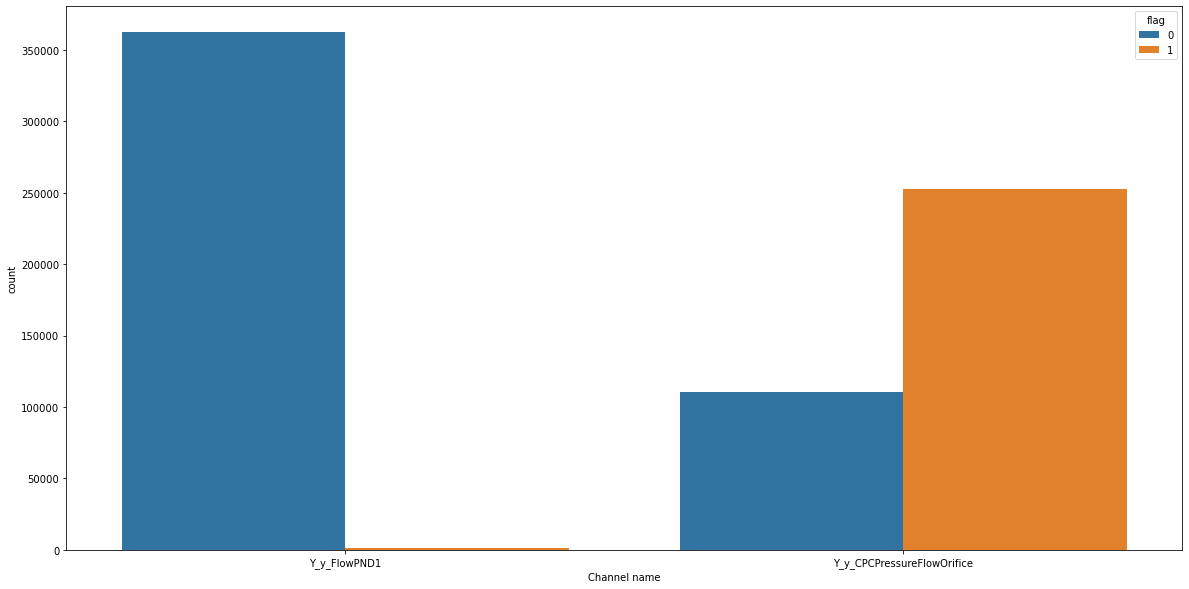

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.countplot(x="Channel name",hue="flag", data=out_of_range)

In [121]:
data = data.sort_values('time')

In [113]:
data['diff_new'] = (data.groupby('equipmentNumber').time.diff().dt.total_seconds().fillna(0))/60

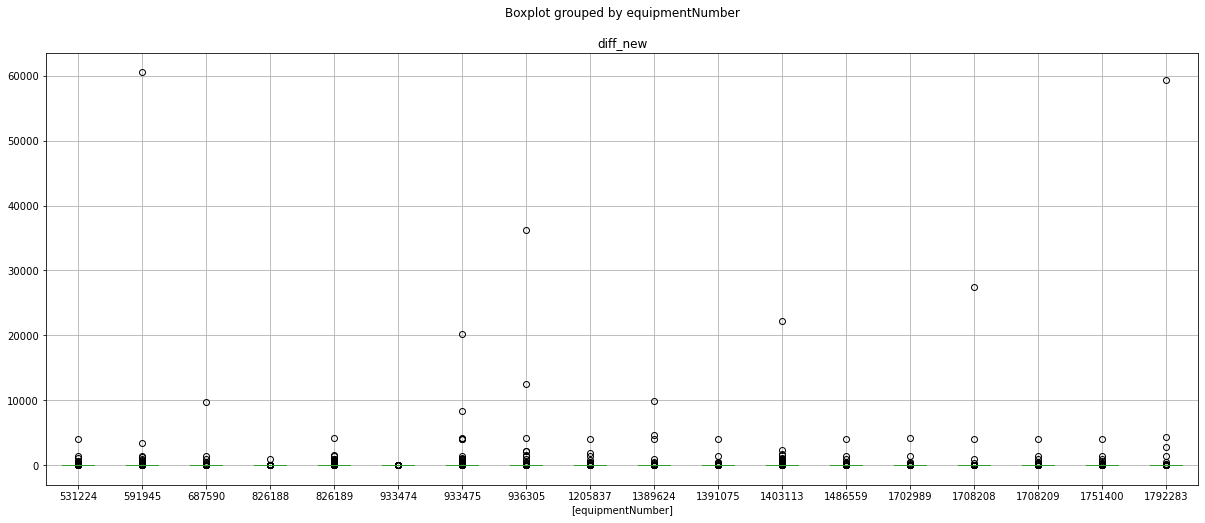

In [114]:
data.boxplot(column=['diff_new'], by=['equipmentNumber'], figsize = (20,8))

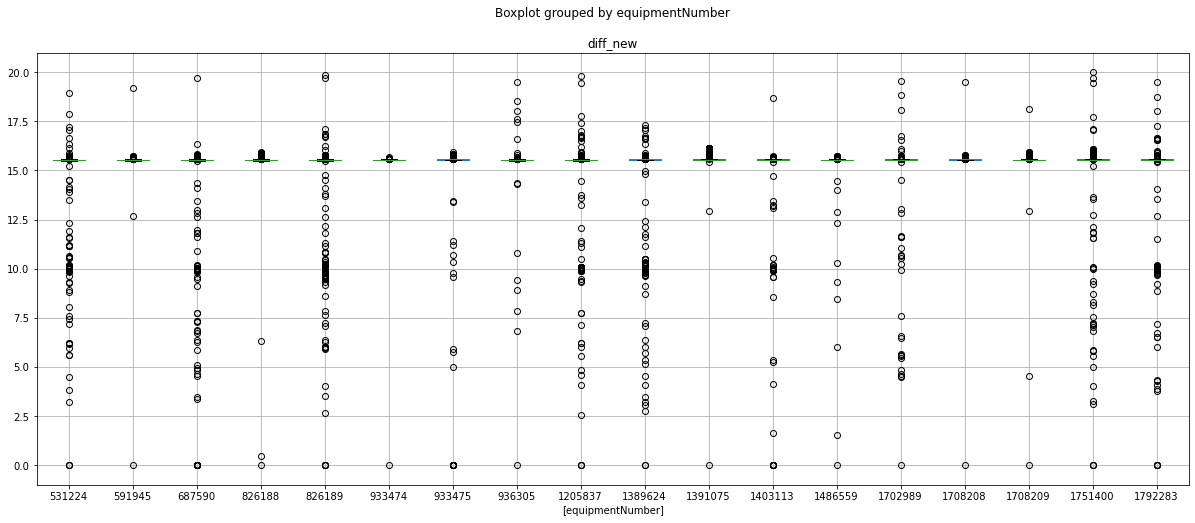

In [115]:
data[data['diff_new']<=20].boxplot(column=['diff_new'], by=['equipmentNumber'], figsize = (20,8))

[Text(0, 0.5, 'Average Time Frequency'), Text(0.5, 0, 'Equipment no.')]

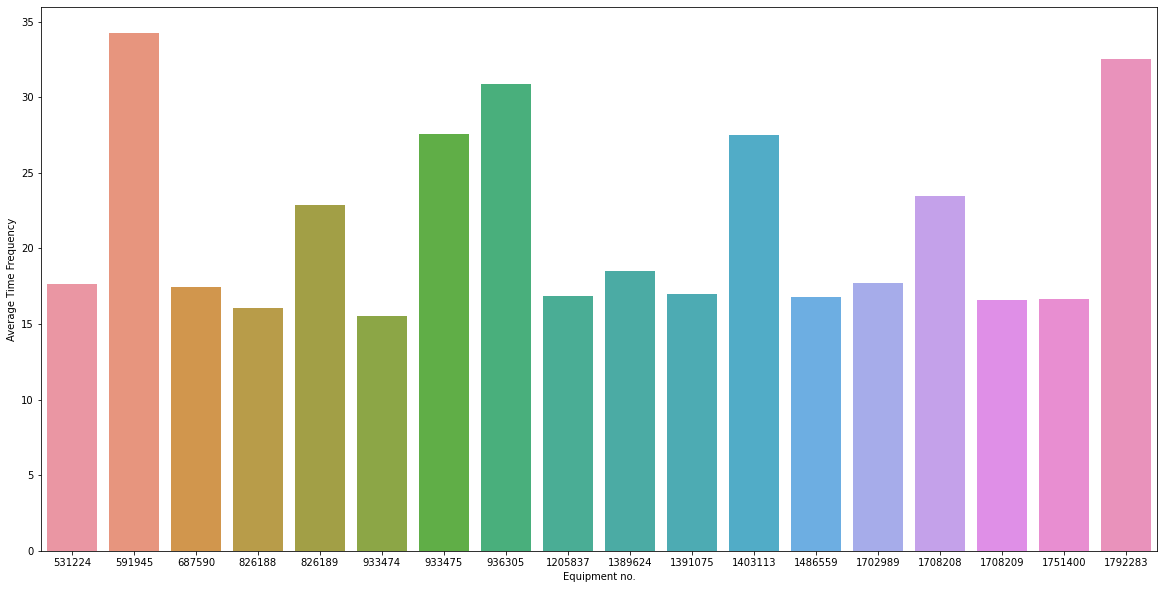

In [78]:
data1 = pd.DataFrame(data.groupby('equipmentNumber').diff_new.mean()).reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.barplot(x="equipmentNumber", y="diff_new", data=data1)
ax.set(xlabel='Equipment no.', ylabel='Average Time Frequency')